### 본 코드는 아래 링크 주소를 참조하여 작성된 파일입니다. <br>
[링크주소] https://velog.io/@ckh0824/Spaceship-Titanic-kaggle

우주 미스터리를 풀기 위해 데이터 과학 기술이 필요한 2912년에 오신 것을 환영합니다. 우리는 4광년 떨어진 곳에서 전송을 받았는데 상황이 좋지 않습니다.

우주선 타이타닉은 한 달 전에 발사된 성간 여객선이다. 거의 13,000명의 승객을 태운 이 배는 태양계에서 온 이민자들을 근처 별들을 돌고 있는 새로 살 수 있는 세 개의 외계 행성으로 실어 나르는 처녀 항해를 시작했다.

첫 번째 목적지인 알파 센터우리로 향하는 도중, 방심한 우주선 타이타닉은 먼지 구름 속에 숨겨진 시공간 이상과 충돌했다. 안타깝게도, 그것은 1000년 전의 이름과 비슷한 운명을 만났습니다. 비록 그 배는 손상되지 않았지만, 거의 절반의 승객들이 다른 차원으로 옮겨졌습니다!

## **1. 패키지 가져오기**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [44]:
# 가끔 출력 되는 에러 메세지 출력을 없애기 위한 코드입니다.
warnings.simplefilter(action='ignore')

In [45]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **2. 데이터 확인**


* PassengerId : 승객 ID
* HomePlanet : 출발 행성(거주지)
* CryoSleep - 취침 방식 여부
* Cabin : 객실 종류 및 번호 (port : 좌현, starboard : 우현)
* Destination : 목적지
* Age : 승객의 나이
* VIP : 승객의 VIP 서비스 유무
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck : 승객이 해당 서비스에 대해 지불한 금액
* Name : 이름
* Transported : 도착 여부

In [46]:
trainCSV = '/content/drive/MyDrive/[2022]AICE자격증반/AICE예제/Titanic2/train.csv'
testCSV  = '/content/drive/MyDrive/[2022]AICE자격증반/AICE예제/Titanic2/test.csv' 
train_data = pd.read_csv(trainCSV)
print(train_data.shape)
train_data

(8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [47]:
train_data.info() #데이터 자료형 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [48]:
#데이터 결측치 확인
train_data.isnull().sum() 

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [49]:
train_data.describe() #수치형 데이터 확인

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [50]:
train_data.describe(include=['O']) #범주형 데이터 확인

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


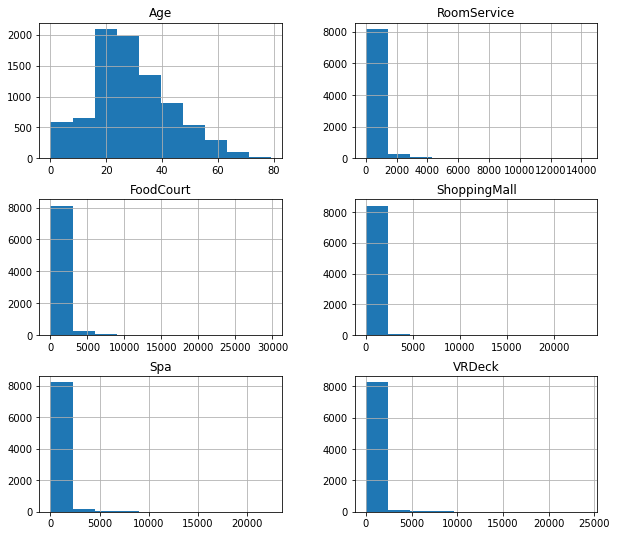

In [51]:
train_data.hist(figsize=(10, 9))
plt.show()

### 출발행성의 리스트와 도착행성의 리스트를 확인

In [52]:
# 출발 행성의 리스트3개, 도착 행성의 리스트 3개
train_data['HomePlanet'].unique(), train_data['Destination'].unique()

(array(['Europa', 'Earth', 'Mars', nan], dtype=object),
 array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object))

### cyrosleep을 몇명이나 신청했는가?

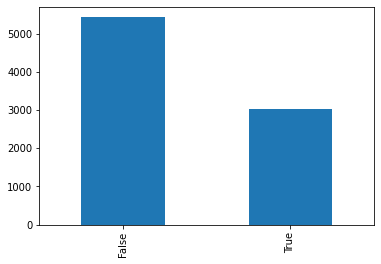

In [53]:
# cyroSleep을 신청하지 않은 사람이 더 많다.
train_data['CryoSleep'].value_counts().plot(kind='bar')

False    8291
True      199
Name: VIP, dtype: int64


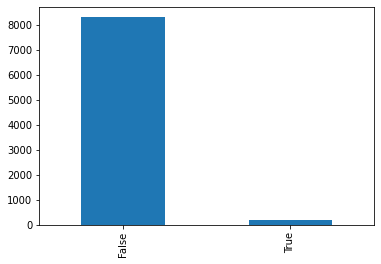

In [54]:
# VIP서비스를 신청하지 않는 사람이 압도적으로 많다.
print(train_data['VIP'].value_counts())
train_data['VIP'].value_counts().plot(kind='bar')

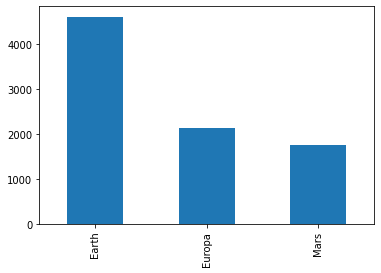

In [55]:
train_data['HomePlanet'].value_counts().plot(kind='bar')

### 그래프를 그리기 위해서는 데이터셋으로부터 질문들이 필요하다. 질문을 시각화하기 위해서 그래프를 사용한다.

## 3. **데이터 전처리 및 분석**


In [56]:
# 객실 종류, 객실 번호, 객실 좌우(위치)
train_data["Cabin"]

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

### 데이터를 전처리 과정중에서도 데이터타입이나 형태를 변환하기전에 가장 먼저 하는 것이 **결측치 처리**

In [15]:
# 결측치 처리
# 'CyroSleep'의 null의 갯수 확인
print(train_data['CryoSleep'].isnull().sum())

# 'CryoSleep'컬럼에서 최빈값은 0이다.
most_freq = train_data['CryoSleep'].mode()[0]
print(type(most_freq))

# 결측치를 최빈값으로 채우기
train_data['CryoSleep'] = train_data['CryoSleep'].fillna(most_freq)

# 'CyroSleep'의 null의 갯수 확인
print(train_data['CryoSleep'].isnull().sum())

217
<class 'bool'>
0


In [62]:
# 문자열 데이터라고 오해할 수 있다.
train_data['Cabin'].mode()[0]
type(train_data['Cabin'].mode()[0])

str

In [41]:
train_data['VRDeck']

0          0.0
1         44.0
2         49.0
3        193.0
4          2.0
         ...  
8688      74.0
8689       0.0
8690       0.0
8691    3235.0
8692      12.0
Name: VRDeck, Length: 8693, dtype: float64

In [17]:
# VIP서비스는 신청안한사람이 압도적으로 많았으므로 
# 0 으로 채운다는 의미는 최빈값으로 채운다.
# 서비스 비용,나이를 제외한 나머지는 최빈값으로 채운다. 
train_data['VIP'] = train_data['VIP'].fillna(0)
train_data['Cabin'] = train_data['Cabin'].fillna(train_data['Cabin'].mode()[0])
train_data['HomePlanet'] = train_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0])
train_data['Destination'] = train_data['Destination'].fillna(train_data['Destination'].mode()[0])
# 서비스 비용에 관련된 컬럼은 모두 중앙값으로 결측치를 채운다.
# 데이터값의 편차가 매우 심하므로 mean()보다는 median()을 사용했다.
train_data['ShoppingMall'] = train_data['ShoppingMall'].fillna(train_data['ShoppingMall'].median())
train_data['VRDeck'] = train_data['VRDeck'].fillna(train_data['VRDeck'].median())
train_data['FoodCourt'] = train_data['FoodCourt'].fillna(train_data['FoodCourt'].median())
train_data['Spa'] = train_data['Spa'].fillna(train_data['Spa'].median())
train_data['RoomService'] = train_data['RoomService'].fillna(train_data['RoomService'].median())
# 나이는 중앙값으로 채운다.
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

In [18]:
# 'Name'컬럼을 제외하고 결측치를 모두 채웠다.
# 'Name'은 결측치를 해결하기 어렵다.
train_data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [19]:
# 'Cabin'컬럼을 3개로 나누자.
# 컬럼의 이름을 "Cabin_1","Cabin_2","Cabin_3"

cab = train_data['Cabin'].apply(lambda x: x.split('/'))
train_data['Cabin_1'] = cab.apply(lambda x:x[0])
train_data['Cabin_2'] = cab.apply(lambda x:int(x[1]))
train_data['Cabin_3'] = cab.apply(lambda x:x[2])

In [20]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_1,Cabin_2,Cabin_3
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   object 
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Cabin_1       8693 non-null   object 
 15  Cabin_2       8693 non-null   int64  
 16  Cabin_3       8693 non-null   object 
dtypes: bool(2), float64(6), int64(1), object(8)
memory usage: 1.0+ MB


In [22]:
# 불필요한 컬럼 : ['PassengerId','Cabin', 'Name']
train_data.drop(['PassengerId','Cabin', 'Name'], axis=1, inplace=True)

In [23]:
# 데이터 타입을 bool타입 -> int로 변경
train_data['VIP'] = train_data['VIP'].astype(int)
train_data['CryoSleep'] = train_data['CryoSleep'].astype(int)
#train_data['Transported'] = train_data['Transported'].astype(int)

In [24]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_1,Cabin_2,Cabin_3
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [25]:
# 결측치 해결
train_data.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Cabin_1         0
Cabin_2         0
Cabin_3         0
dtype: int64

In [26]:
# 모든 입력 데이터를 one hot encoding으로 변환
input_data = train_data.drop(['Transported'], axis = 1)
encoding_train_data = pd.get_dummies(input_data)
encoding_train_data

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_2,HomePlanet_Earth,...,Cabin_1_A,Cabin_1_B,Cabin_1_C,Cabin_1_D,Cabin_1_E,Cabin_1_F,Cabin_1_G,Cabin_1_T,Cabin_3_P,Cabin_3_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,98,0,...,1,0,0,0,0,0,0,0,1,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,1499,1,...,0,0,0,0,0,0,1,0,0,1
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1500,1,...,0,0,0,0,0,0,1,0,0,1
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,608,0,...,0,0,0,0,1,0,0,0,0,1


## 데이터 탐색을 위한 시각화
데이터의 특성을 분석하는데 많은 도움을 준다.

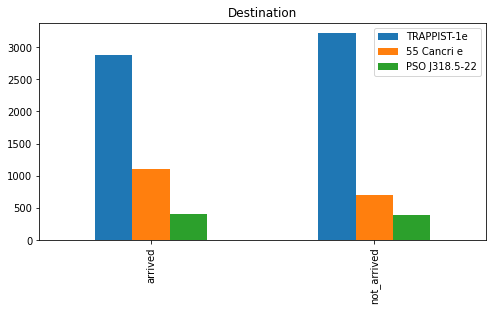

In [27]:
# Destination VS Arrived
train_data[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported')

arrived = train_data[train_data['Transported'] == 1]['Destination']. value_counts()
not_arrived = train_data[train_data['Transported'] == 0]['Destination']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df. index = ['arrived','not_arrived']
df. plot(kind= 'bar',stacked= False , figsize= (8,4))
plt.title('Destination')
plt. show()

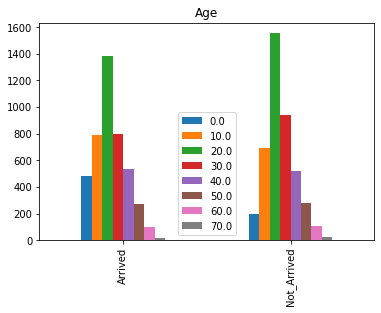

In [28]:
# Age VS Arrived
train_data.loc[(train_data['Age'] >= 0) & (train_data['Age'] < 10), 'Age'] = 0
train_data.loc[(train_data['Age'] >= 10) & (train_data['Age'] < 20), 'Age'] = 10
train_data.loc[(train_data['Age'] >= 20) & (train_data['Age'] < 30), 'Age'] = 20
train_data.loc[(train_data['Age'] >= 30) & (train_data['Age'] < 40), 'Age'] = 30
train_data.loc[(train_data['Age'] >= 40) & (train_data['Age'] < 50), 'Age'] = 40
train_data.loc[(train_data['Age'] >= 50) & (train_data['Age'] < 60), 'Age'] = 50
train_data.loc[(train_data['Age'] >= 60) & (train_data['Age'] < 70), 'Age'] = 60
train_data.loc[(train_data['Age'] >= 70) & (train_data['Age'] < 80), 'Age'] = 70

Arrived = train_data[train_data['Transported'] == 1]['Age']. value_counts()
Not_Arrived = train_data[train_data['Transported'] == 0]['Age']. value_counts()
df = pd. DataFrame([Arrived, Not_Arrived])
df. index = ['Arrived','Not_Arrived']
df. plot(kind= 'bar',stacked= False , figsize= (6,4)). legend(loc = 'lower center')
plt.title('Age')
plt. show()

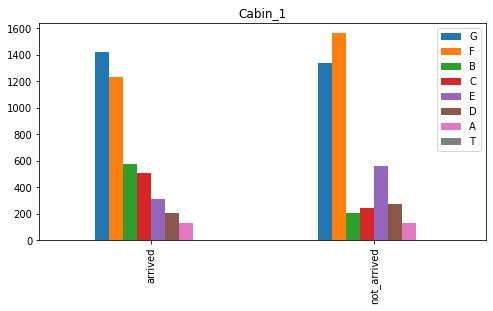

In [29]:
# Cabin VS arrived
arrived = train_data[train_data['Transported'] == 1]['Cabin_1']. value_counts()
not_arrived = train_data[train_data['Transported'] == 0]['Cabin_1']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df. index = ['arrived','not_arrived']
df. plot(kind= 'bar',stacked= False , figsize= (8,4))
plt.title('Cabin_1')
plt. show()

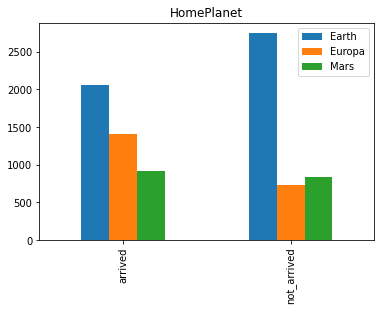

In [30]:
# HonePlanet VS arrived
train_data[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported')

arrived = train_data[train_data['Transported'] == 1]['HomePlanet']. value_counts()
not_arrived = train_data[train_data['Transported'] == 0]['HomePlanet']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df.index = ['arrived','not_arrived']
df.plot(kind= 'bar',stacked= False , figsize= (6,4))
plt.title('HomePlanet')
plt. show()

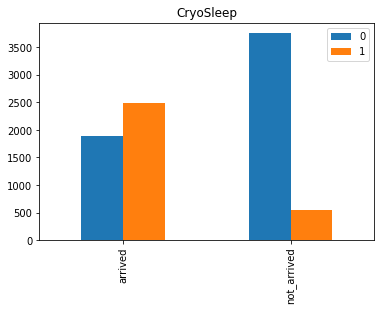

In [31]:
# CryoSleep VS arrived
train_data[['CryoSleep', 'Transported']].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported')

arrived = train_data[train_data['Transported'] == 1]['CryoSleep']. value_counts()
not_arrived = train_data[train_data['Transported'] == 0]['CryoSleep']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df. index = ['arrived','not_arrived']
df. plot(kind= 'bar',stacked= False, figsize= (6,4))
plt.title('CryoSleep')
plt. show()

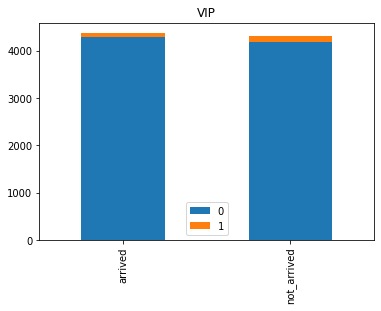

In [32]:
# VIP VS arrived
train_data[['VIP', 'Transported']].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported')

arrived = train_data[train_data['Transported'] == 1]['VIP']. value_counts()
not_arrived = train_data[train_data['Transported'] == 0]['VIP']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df. index = ['arrived','not_arrived']
df. plot(kind= 'bar',stacked= True , figsize= (6,4))
plt.title('VIP')
plt. show()

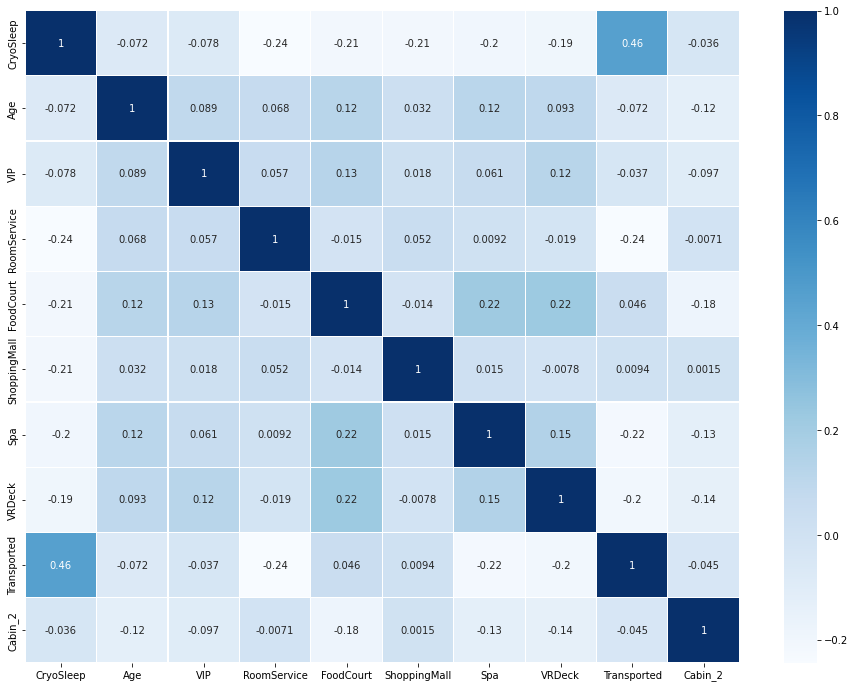

In [33]:
# Heatmap을 이용한 상관관계 및 선형성 확인
plt.figure(figsize = (16, 12))
x = sns.heatmap(train_data.corr(), cmap = 'Blues', linewidths = '0.1',annot = True)

In [34]:
encoding_train_data.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Cabin_2', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Cabin_1_A',
       'Cabin_1_B', 'Cabin_1_C', 'Cabin_1_D', 'Cabin_1_E', 'Cabin_1_F',
       'Cabin_1_G', 'Cabin_1_T', 'Cabin_3_P', 'Cabin_3_S'],
      dtype='object')

In [35]:
# 데이터셋을 분리
from sklearn.model_selection import train_test_split

dropCol = ['Cabin_1_A', 'Cabin_1_G', 'Cabin_1_T', 'Cabin_1_D', 'Cabin_1_C', 'VIP', 'HomePlanet_Mars', 'Destination_PSO J318.5-22']
X = encoding_train_data.drop(dropCol, axis=1)
y = train_data['Transported']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# 머신러닝 모델에 학습
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=123)
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

print(accuracy_score(test_y, pred_y))
print(precision_score(test_y, pred_y))
print(recall_score(test_y, pred_y))
print(f1_score(test_y, pred_y))

0.7912593444508338
0.8025851938895417
0.7779043280182233
0.790052053209948


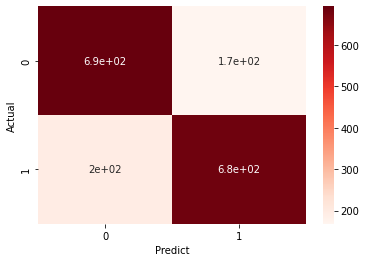

In [38]:
data = confusion_matrix(test_y, pred_y)

# seaborn으로  그려보자.
sns.heatmap(data, annot=True, cmap='Reds')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [39]:
from sklearn.metrics import classification_report

print(classification_report(test_y, pred_y, labels=[False,True]))

              precision    recall  f1-score   support

       False       0.78      0.80      0.79       861
        True       0.80      0.78      0.79       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

